## load datasets

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape, digits.target

((1797, 64), array([0, 1, 2, ..., 8, 9, 8]))

In [2]:
X_train, X_test = digits.data[:1000], digits.data[1000:]
y_train, y_test = digits.target[:1000], digits.target[1000:]

## train xgboost w/ CV

In [3]:
import xgboost as xgb
cls = xgb.XGBClassifier()

In [4]:
from sklearn.model_selection import GridSearchCV

In [5]:
cls_cv = GridSearchCV(cls, {'max_depth': [2,4,6], 'n_estimators': [50,100,200]}, verbose=1)

In [6]:
cls_cv.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   51.1s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [50, 100, 200], 'max_depth': [2, 4, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [7]:
cls_cv.best_params_

{'max_depth': 2, 'n_estimators': 200}

In [8]:
cls_cv.best_score_

0.88200000000000001

## train xgboost

In [9]:
cls = xgb.XGBClassifier(**cls_cv.best_params_)
cls.fit(X_train, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=2,
       min_child_weight=1, missing=None, n_estimators=200, nthread=-1,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [21]:
import pickle
pickle.dump(cls, open("best_boston.pkl", "wb"))
cls = pickle.load(open("best_boston.pkl", "rb"))

## evaluate model

In [10]:
pred = cls.predict(X_test)

In [11]:
from sklearn.metrics import confusion_matrix, classification_report
conf_mat = confusion_matrix(y_test, pred)
print classification_report(y_test, pred)

             precision    recall  f1-score   support

          0       0.94      0.97      0.96        79
          1       0.90      0.79      0.84        80
          2       0.99      0.88      0.93        77
          3       0.89      0.82      0.86        79
          4       0.94      0.90      0.92        83
          5       0.92      0.95      0.93        82
          6       0.95      0.97      0.96        80
          7       0.96      0.96      0.96        80
          8       0.82      0.91      0.86        76
          9       0.79      0.90      0.84        81

avg / total       0.91      0.91      0.91       797



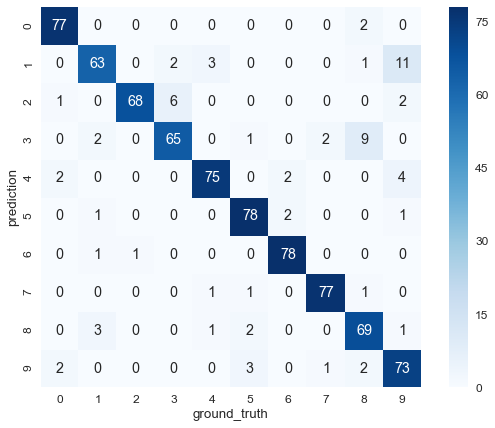

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=1.2)

df = pd.DataFrame(conf_mat, index = list("0123456789"), columns=list("0123456789"))

plt.figure(figsize = (10,7))
sns.heatmap(df, annot=True, square=True, fmt='.0f', cmap="Blues")
plt.xlabel('ground_truth')
plt.ylabel('prediction')